# Connecting to Hardware

**SUMMARY**: *In this lab, you'll learn how to setup and connect to your ChipWhisperer hardware. We'll also cover how to build firmware for your target microcontroller, how to capture power traces, and how to communicate with target devices.*

*All the API calls we'll be using here are documented on the [ChipWhisperer readthedocs page](https://chipwhisperer.readthedocs.io/en/latest/api.html), so feel free to open it in another tab and follow along there as well.*

**LEARNING OUTCOMES:**
* Setting up your ChipWhisperer Hardware
* Using the ChipWhisperer Python API to connect to your hardware
* Communication with the target
* Capturing a power trace

## Prerequisites

Hold up - before continuing, ensure you have done the following:

* ☑ Validated your setup using the [ChipWhisperer Setup Test](./ChipWhisperer%20Setup%20Test.ipynb) notebook.
* ☑ Run through the Jupyter introduction.

## Physical Setup

### CW-Husky with CW313/SAM4S

The only connections you need to make are with the 20-pin connector and the two SMA cables. The only settings to confirm are that JP2 is set to T-GPIO4 and that JP1 and JP4 are connected:

<img src="img/cwhusky.jpg" alt="CW-Husky Plugged In" width=500>

For the tutorials, you should use `PLATFORM='CWHUSKY'`

### ChipWhisperer-Nano

The ChipWhisperer-Nano is a single-board device. It includes the capture hardware, along with a built in STM32F0 target. To use this target, simply plug in the device, then go get a drink to reward yourself:

<img src="img/cwnano.jpg" alt="CW-Nano Plugged In" width=400>

For the tutorials, you should use `PLATFORM='CWNANO'`.

### ChipWhisperer-Lite (Single Board)

The ChipWhisperer-Lite is a single-board device. It includes the capture hardware, along with a built in STM32F3 or XMEGA target. To use this target, simply plug in the device:

<img src="img/cwlite_plugged.jpg" alt="CW-Lite Plugged In" width=400>

If you have an STM32F3 target, you should use `PLATFORM='CWLITEARM'` for the tutorials. If you have an XMEGA target, you should use `PLATFORM='CWLITEXMEGA'`.

### ChipWhisperer-Lite (2-Part Version)

The ChipWhisperer-Lite 2-Part version includes the ChipWhisperer-Capture along with an XMEGA target. You need to attach the SMA & IDE cables, then plug in the USB cable:

<img src="img/cw_2part.jpg" alt="CW-Lite 2-Part Connected" width=500>

For the tutorials, you should use `PLATFORM='CWLITEXMEGA'`.

### ChipWhisperer-Lite (Capture + UFO), Includes SCAPACK-L1/SCAPACK-L2

This package uses a ChipWhisperer-Lite Capture board, along with a CW308 UFO target board. You'll need to attach the CW308 board to your ChipWhisperer-Lite Capture, and plug in your choosen target board. The suggested target for most tutorials is the `CW308_STM32F3` - you can tell this target by checking the part number on the chip, look for a `STM32F303`.

Here is an overview photo of the target plugged in:

<img src="img/cwcapture_ufo.jpg" alt="CW-Lite Plugged Into UFO" width=600>

If using the F3 for the tutorials, you should use `PLATFORM='CW308_STM32F3'`.

See Section below on UFO Target Settings.

### ChipWhisperer-Pro

This package uses a ChipWhisperer-Pro Capture device, along with a CW308 UFO target board. You'll need to attach the CW308 board to your ChipWhisperer-Pro Capture, and plug in your choosen target board. The suggested target for most tutorials is the `CW308_STM32F3` - you can tell this target by checking the part number on the chip, look for a `STM32F303`.

Here is an overview photo of the business end of the CW-Pro plugged into the UFO board. You'll need to also plug in the USB-A cable, and possibly the DC power jack (2.1mm DC power jack, 5V comes from either USB or wall adapter). Earlier hardware revisions always needed the DC power jack, later hardware revisions will use USB power (but high-power targets still need extra juice).

<img src="img/cwpro_ufo.jpg" alt="CW-Pro Plugged In" width=500>

If using the F3 for the tutorials, you should use `PLATFORM='CW308_STM32F3'`.

See Section below on UFO Target Settings.

### UFO Target Settings

The UFO Board comes by default with working settings for most targets. A summary of the default jumper settings is included below for you, see the product documentation for more details.

<img src="img/cwufo_stm32f3.jpg" alt="UFO Board" width=500>

#### UFO Default Settings

* J1  - 3.3V (CW3.3V)
* J3  - HS2/OUT
* J14 - FILT/FILT_LP/FILT_HP
* J16 - No connection

* S1 -  ON

* 3.3V SRC - J1/CW
* VADJ SRC - 3.3V
* 1.2V, 1.8V, 2.5V, 3.3V, LDO SRC - J1/CW
* 5V SRC - J1/CW

### CW-Lite single board: XMEGA vs ARM

If you are unsure which single-part version you have, the following shows both boards. Note the only difference is the target section on the right.

<img src="img/cwlitearm_vs_cwlitexmega.jpg" alt="CW-Lite XMEGA vs Arm Board" width=500>

If you have an STM32F3 target, you should use `PLATFORM='CWLITEARM'` for the tutorials. If you have an XMEGA target, you should use `PLATFORM='CWLITEXMEGA'`.

## Connecting to ChipWhisperer

Now that your hardware is all setup, we can now learn how to connect to it. We can connect to the ChipWhisperer with:

In [134]:
import chipwhisperer as cw
scope = cw.scope()

By default, ChipWhisperer will try to autodetect the type of device your're running (CWLite/CW1200 or CWNano), see API documentation for manually specifying the scope type. If you have multiple ChipWhisperer devices connected, you'll need to specify the serial number of the device you want to connect to:

```python
scope = cw.scope(sn='<some long string of numbers>')
```

For more information, see the API section on readthedocs.

Connecting to the target device is simple as well:

In [135]:
target = cw.target(scope, cw.targets.SimpleSerial) #cw.targets.SimpleSerial can be omitted

We'll only be discussing the default target type, which is SimpleSerial. Other targets, like the CW305, will be covered in hardware specific demos. 

Some sane default settings can be set using:

In [136]:
scope.default_setup()

which from its [documentation](https://chipwhisperer.readthedocs.io/en/latest/api.html#chipwhisperer.capture.scopes.OpenADC.OpenADC.default_setup) you can see does the following for the CWLite/CW1200:

* Sets the scope gain to 45dB
* Sets the scope to capture 5000 samples
* Sets the scope offset to 0 (aka it will begin capturing as soon as it is triggered)
* Sets the scope trigger to rising edge
* Outputs a 7.37MHz clock to the target on HS2
* Clocks the scope ADC at 4\*7.37MHz. Note that this is *synchronous* to the target clock on HS2
* Assigns GPIO1 as serial RX
* Assigns GPIO2 as serial TX

And that's it! Your ChipWhisperer is now setup and ready to attack a target. 

**NOTE: You'll need to disconnect the scope/target before connecting again, like you would in another notebook. This can be done with `scope.dis()` and `target.dis()`**

## Building and Uploading Firmware

The next step in attacking a target is to get some firmware built and uploaded onto it. Most firmware for most ChipWhisperer targets can be built using our build system, provided you have the correct compiler installed (see https://chipwhisperer.readthedocs.io/en/latest/prerequisites.html#prerequisites for info about compilers).

Firmware must be built on the command line. Luckily, thanks to Jupyter, we can run a command within a notebook as follows:

In [132]:
%%bash
cd ../hardware/victims/firmware/simpleserial-base/
make PLATFORM='CWNANO' CRYPTO_TARGET=NONE

SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
make[1]: '.dep' is up to date.
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
.
Welcome to another exciting ChipWhisperer target build!!
arm-none-eabi-gcc.exe (GNU Arm Embedded Toolchain 10-2020-q4-major) 10.2.1 20201103 (release)
Copyright (C) 2020 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

.
Compiling:
    simpleserial-base.c ...Done!
.
Compiling:
    .././simpleserial/simpleserial.c ...Done!
.
Compiling:
    .././hal/stm32f0_nano/stm32f0_hal_nano.c ...Done!
.
Compiling:
    .././hal/stm32f0/stm32f0_hal_lowlevel.c ...Done!
.
Assembling: .././hal/stm32f0/stm32f0_startup.S
arm-none-eabi-gcc -c -mcpu=cortex-m0 -I. -x assembler-with-cpp -mthumb -mfloat-abi=soft -ffunction-sections -DF_CPU=7372800 -Wa,-gstabs,-adhlns=objdir-CWNANO/stm32f0_startup.lst

You should see a big list of `PLATFORM`s to build for. We left the `PLATFORM` blank in the command above, so the build system instead printed a list of supported platforms. Fill in your platform, rerun the build command, and your firmware should be successfully built.

Continuing on, there's two possible ways to upload firmware to your target:

1. ChipWhisperer has built in support for XMEGA, STM32F*, and AVR bootloaders. These can be used as follows

In [137]:
#cw.program_target(scope, cw.programmers.XMEGAProgrammer, "path/to/firmware.hex")
cw.program_target(scope, cw.programmers.STM32FProgrammer, "C:/myprojects/chipwhisperer/hardware/victims/firmware/simpleserial-base/simpleserial-base-CWNANO.hex")
#cw.program_target(scope, cw.programmers.AVRProgrammer, "path/to/firmware.hex")

Detected known STMF32: STM32F03xx4/03xx6
Extended erase (0x44), this can take ten seconds or more
Attempting to program 4655 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 4655 bytes


2. For other targets, you'll need to use an external programmer or a debugger to flash the firmware onto the target. 

Whatever your case, upload the firmware we built earlier to the target device. Next we'll be learning how to capture power traces and communicate with the target.

## Communication with the Target

Communication with targets, which is done through the `SimpleSerial target` object we got earlier, is grouped into two categories:

1. Raw serial via `target.read()`, `target.write()`, `target.flush()`, etc. 

1. SimpleSerial commands via `target.simpleserial_read()`, `target.simpleserial_write()`, `target.simpleserial_wait_ack()`, etc.

The firmware we uploaded uses the simpleserial protocol (https://wiki.newae.com/SimpleSerial), so we'll start off with simpleserial. Later, we'll use the raw serial commands to send the same messages.

If you check the simpleserial-base firmware (`simpleserial-base.c`) you'll find that for the simpleserial `'p'` command, the target will echo back the command. Let's try that out now:

In [20]:
msg = bytearray([0]*16) #simpleserial uses bytearrays
target.simpleserial_write('p', msg)

Let's check if we got a response:

In [21]:
print(target.simpleserial_read('r', 16))

bytearray(b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00')


It also has a `'k'` command. Try sending that now:

In [22]:
msg = bytearray([1]*16)
target.simpleserial_write('k', msg)

That command doesn't return anything to us, but it should ack and give us an error return:

In [23]:
print(target.simpleserial_wait_ack()) #should return 0

0


Simpleserial messages generally take the form:

```python
command_character + ascii_encoded_bytes + '\n'
```

For our first command, `command_character='p'` and `ascii_encoded_bytes="00"*32` (keep in mind this isn't a binary `0x00`, it's ASCII `"00"`, which has a binary value of `0x3030`). Try resending the `'p'` command from earlier using `target.write()`:

In [116]:
msg = '0'*32
#target.write('p'+ msg +'\n') #fill in the rest here
target.write('p126110475e17505a6966be70c89a829d\n')

A simple `target.read()` will return all the characters that have been sent back from the target so far. Let's see what the device returned to us:

In [94]:
print(target.read())

r126110475E17505A6966BE70C89A829C
z00



In [110]:
recv_msg = ""

In [117]:
recv_msg += target.read() #you might have to run this block a few times to get the full message
print(recv_msg)

r126110475E17505A6966BE70C89A829A
z00
r126110475E17505A6966BE70C89A829B
z00
r126110475E17505A6966BE70C89A829C
z00
r126110475E17505A6966BE70C89A829D
z00



The simpleserial commands are usually sufficient for taking to simpleserial firmware, but you'll need the raw serial commands for some of the other labs.

## SimpleSerial 2

As of ChipWhisperer 5.4, a new target communication protocol, SimpleSerial 2 is available. It has a number of advantages over the old SimpleSerial protocol:

1. Data is unencoded binary (except for byte stuffing) instead of ACII encoded, meaning far more data can be sent per packet (just under double)
1. It's got a command and subcommand field that get passed to the target callback functions, meaning more can be done per packet. For example, the simpleserial-aes firmware has been modified to allow plaintext, key, and/or mask to be set with a single packet.
1. It's got a length field, meaning the same target commands can take different length packets depending on the situation. This, for example, allows both plaintext and key (or only one) to be send with the same command in simpleserial-aes.
1. It's got an 8-bit CRC (0xA6) for data integrety.
1. Frames are consistant overhead byte stuffed (COBS). This makes it easy to reset communication (done simply by sending two 0x00 bytes) and helps catch malformed length bytes.

It is, however, a more complicated protocol. You cause use it by compiling firmware with `SS_VER=SS_VER_2_0` and using `cw.targets.SimpleSerial2`. In `sca101` and `fault101`, it can be used by setting `SS_VER='SS_VER_2_0'` when setting `PLATFORM` and `SCOPETYPE`.

## Capturing Traces

Now that the target's programmed and we know how to communicate with it, let's start recording some power traces! To capture a trace:

1. Arm the ChipWhisperer with `scope.arm()`. It will begin capturing as soon as it is triggered (which in our case is a rising edge on `gpio4`.
1. `scope.capture()` will read back the captured power trace, blocking until either ChipWhisperer is done recording, or the scope times out. Note that the error return will tell you whether or not the scope timed out. It does not return the captured scope data.
1. You can read back the captured power trace with `scope.get_last_trace()`.

`simpleserial_base` will trigger the ChipWhisperer when we send the `'p'` command. Try capturing a trace now:

In [126]:
msg = bytearray([1]*16) #simpleserial uses bytearrays

scope.arm()
target.simpleserial_write('p', msg)
scope.capture();
traces = scope.get_last_trace()


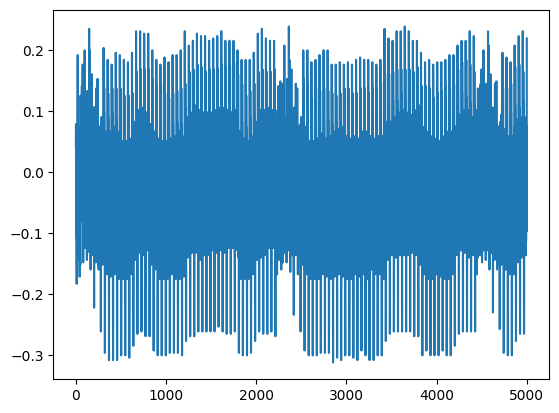

In [127]:
import matplotlib.pylab as plt
plt.plot(traces)
plt.show()

ChipWhisperer also has a `capture_trace()` convience function that:

1. Optionally sends the `'k'` command
1. Arms the scope
1. Sends the `'p'` command
1. Captures the trace
1. Reads the return `'r'` message
1. Returns a `Trace` class that groups the trace data, `'p'` message, the `'r'` message, and the `'k'` message

It isn't always the best option to use, but it's usually sufficient for most simpleserial applications

In [147]:
msg = bytearray([1]*16) 
trace2 = cw.capture_trace(scope, target, msg)
print(trace2)

Trace(wave=array([-0.04296875,  0.08203125, -0.05859375, ..., -0.06640625,
       -0.11328125,  0.203125  ]), textin=bytearray(b'\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01'), textout=bytearray(b'\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01'), key=None)


In [148]:
print(scope.get_last_trace())

[-0.04296875  0.08203125 -0.05859375 ... -0.06640625 -0.11328125
  0.203125  ]


In [150]:
print(trace2.wave)

[-0.04296875  0.08203125 -0.05859375 ... -0.06640625 -0.11328125
  0.203125  ]


In [157]:
print (scope.get_last_trace()==trace2.wave )

[ True  True  True ...  True  True  True]


## Conclusion

And that's it! You should be all ready to continue on to SCA101 (or any other of our courses).

We've glossed over some stuff here, so consult the [API documentation](https://chipwhisperer.readthedocs.io/en/latest/api.html) or ask on our [forums](https://forum.newae.com) if you get stuck.

As a final step, we should disconnect from the hardware so it doesn't stay "in use" by this notebook.

In [158]:
scope.dis()
target.dis()

## ChipWhisperer-Husky

While the ChipWhisperer-Husky has many new features, its API has been designed to keep most basic tasks the same, especially with power analysis. You should be able to go through SCA101 without learning anything Husky specific and fault101 will cover any Husky specific things you need to know. That being said, you may still find it helpful to refer to the `demos/husky` folder, starting with [01 - Introduction to ChipWhisperer-Husky.ipynb](demos/husky/01%20-%20Introduction%20to%20ChipWhisperer-Husky.ipynb) to learn more about its advanced features.